<a href="https://colab.research.google.com/github/Faouzi-Slimi/python_Avancee/blob/main/Passengers_Tp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare Data

In [1]:
# Import Packages
import tensorflow as tf
import pandas as pd 
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras import layers,Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn import preprocessing

import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from numpy import array
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras import layers
from keras.layers import Embedding
from tensorflow.keras.layers import LSTM,Bidirectional,GRU

from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [3]:
# Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import Data

data = pd.read_csv('/content/drive/MyDrive/air122.csv')

In [4]:
# Check Data
data.head(10)


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [5]:
# Check "Month" column type
data['Month'].dtype

dtype('O')

In [6]:
## Reset Index

data= data.reset_index()

In [7]:
# Check Data
data.head(10)

,index,Month,Passengers
0,0,1949-01,112
1,1,1949-02,118
2,2,1949-03,132
3,3,1949-04,129
4,4,1949-05,121
5,5,1949-06,135
6,6,1949-07,148
7,7,1949-08,148
8,8,1949-09,136
9,9,1949-10,119


In [8]:
# Extract Features

seq=data['Passengers']
X= []


for i in range(len(seq)-1):
    val=seq[i]
    X.append(val)    
X= np.array(X)
X

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390])

In [9]:
# EXtract Labels

Y= []
for i in range(1,len(seq)):
    val=seq[i]
    Y.append(val)
        
Y= np.array(Y)
Y

array([118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126,
       141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150, 178,
       163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193, 181,
       183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235, 229,
       243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234, 264,
       302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315, 364,
       347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413, 405,
       355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467, 404,
       347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404, 359,
       310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362,
       405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432])

In [10]:
## Split Data

xtrain, xtest, ytrain, ytest= train_test_split(X,Y,test_size=0.1, random_state=0)
maxx = pd.DataFrame(xtrain).max()
maxx

0    622
dtype: int64

In [11]:
# Check Shape


xtrain.shape, ytrain.shape,xtest.shape,ytest.shape

((128,), (128,), (15,), (15,))

## Lsmt_Model

In [67]:
from keras.backend import dropout
from keras.layers.convolutional import activations
# Set the random Seed
tf.random.set_seed(42)

# Create model

Lstm_Model = Sequential()
Lstm_Model.add(Embedding(input_dim = 623 ,output_dim = 1000, input_length=1))
Lstm_Model.add(LSTM(1000, return_sequences=True,dropout=0.3))
Lstm_Model.add(LSTM(1000
,dropout=0.3))
Lstm_Model.add(Dense(100, activation="relu"))
Lstm_Model.add(Dense(1,activation="linear"))

In [ ]:
Lstm_Model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['mae','mse'])
Lstm_History = Lstm_Model.fit(xtrain, ytrain,validation_data=(xtest,ytest), epochs=50,batch_size=8)

Epoch 1/95
16/16 [==============================] - 6s 224ms/step - loss: 43493.3086 - mae: 166.2735 - mse: 43493.3086 - val_loss: 18575.6699 - val_mae: 117.3044 - val_mse: 18575.6699
Epoch 2/95
16/16 [==============================] - 2s 124ms/step - loss: 18767.4180 - mae: 106.9320 - mse: 18767.4180 - val_loss: 17471.1328 - val_mae: 115.9597 - val_mse: 17471.1328
Epoch 3/95
16/16 [==============================] - 2s 123ms/step - loss: 20022.8398 - mae: 110.2187 - mse: 20022.8398 - val_loss: 15685.0059 - val_mae: 110.5436 - val_mse: 15685.0059
Epoch 4/95
16/16 [==============================] - 2s 126ms/step - loss: 16468.5371 - mae: 103.1299 - mse: 16468.5371 - val_loss: 23240.7168 - val_mae: 124.6719 - val_mse: 23240.7168
Epoch 5/95
16/16 [==============================] - 2s 124ms/step - loss: 11414.8594 - mae: 83.6415 - mse: 11414.8594 - val_loss: 19704.5078 - val_mae: 121.4738 - val_mse: 19704.5078
Epoch 6/95
16/16 [==============================] - 2s 123ms/step - loss: 8746.25

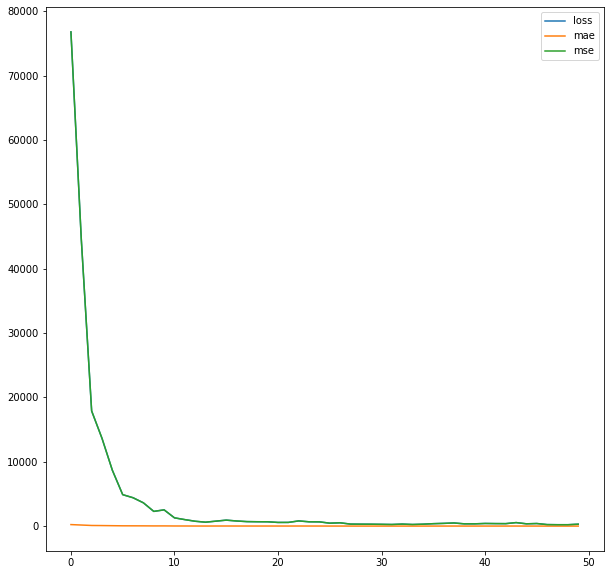

In [82]:
## Plots
pd.DataFrame(Lstm_History.history).plot(figsize=(10,10))

In [83]:
Lstm_Model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, 1, 1000)           623000    
                                                                 
 lstm_37 (LSTM)              (None, 1, 1000)           8004000   
                                                                 
 lstm_38 (LSTM)              (None, 1000)              8004000   
                                                                 
 dense_51 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_52 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 17,633,001
Trainable params: 17,633,001
Non-trainable params: 0
_________________________________________________________________


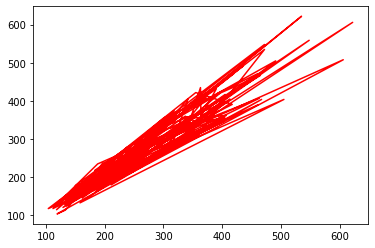

In [84]:
plt.plot(xtrain,ytrain,color="red")